# Case study: heat map

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/wisconsin.zip'

In [3]:
def load_wisconsin(path):
    '''
    Load and clean the wisconsin breast cancer 
    dataset.
    '''
    recoded_label = {'diagnosis': {'M':'1',
                                   'B':'0'}}
    
    to_drop = ['Unnamed: 0', 'id']
    df = (pd.read_csv(path)
            .drop(to_drop, axis=1) 
            .replace(recoded_label)
            .astype({'diagnosis': np.byte})
         )
    return df[df.columns[1:]], df['diagnosis']

In [4]:
X, y = load_wisconsin(DATA_URL)
X.head().head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## Visualising Correlations with a heatmap

In [5]:
def correlation_heat_map(correlation_matrix, cmap='inferno_r', figsize=(8,8)):
    '''
    Correlation heat map
    
    Params:
    -------
    correlation_matrix: pd.DataFrame,
        n x n matrix with feature names
        
    cmap: str, optional (default='inferno_r')
        The colour mapping for the heatmap
        
    figsize: tuple (int, int)
        Size of figure.
        
    Returns:
    -------
    tuple (figure, image)
    '''
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    im = ax.imshow(correlation_matrix, cmap=cmap)

    # Make sure there are enough visible tick marks
    ax.set_xticks(ticks=np.arange(len(correlation_matrix.columns)))
    ax.set_yticks(ticks=np.arange(len(correlation_matrix.columns)))

    # add the feature names and rotate x axis 90 degrees.
    ax.set_xticklabels(list(correlation_matrix.columns), rotation=90)
    ax.set_yticklabels(list(correlation_matrix.index))

    # add colour coding legend
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom");
    
    return fig, im

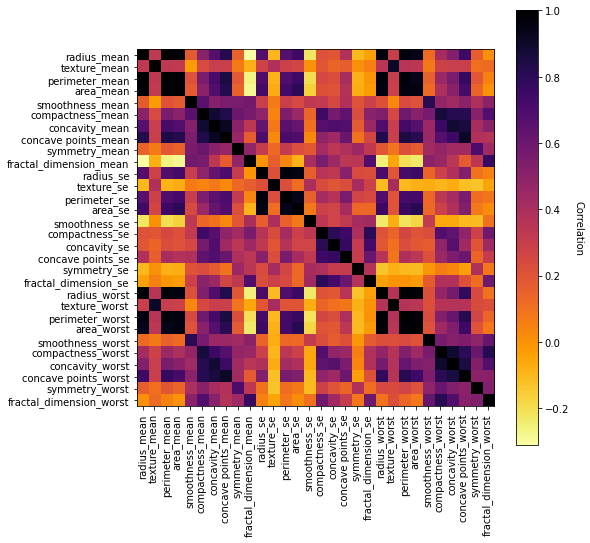

In [6]:
correlation_matrix = X.corr()
fig, im = correlation_heat_map(correlation_matrix = correlation_matrix)
